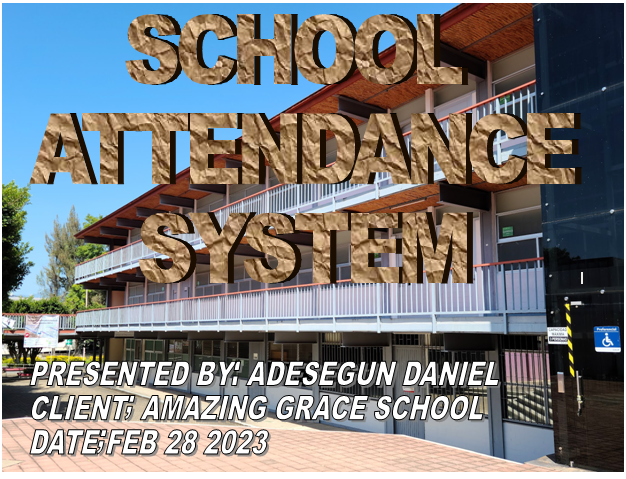

<p style="text-align: center;">
    SCHOOL ATTENDANCE SYSTEM
 BY ADESEGUN DANIEL

# Introduction

The importance of education is becoming very pronounced, and parents around the globe are increasingly becoming dedicated to giving their children essential education. The governments are trying to ensure that it is easy and comfortable for students enrolled in schools, across the country to learn. The teachers also are relentlessly working day and night to ensure they present the knowledge comprehensively. When young sharps gathered in large numbers, special attention is given to their safety and co-habitation. Because of this, structures are set in place to see adequately to this. Part of this structure is the attendance taking on a daily base to keep a record of which students are in school on a particular day. This also helps to identify a student that is slowly becoming a truant. This has been a very effective way of keeping students in check for a very long time and even to date. But as the number of students enrolling in schools and colleges is increasing per year some strategic improvement must be put in place if the purpose of attendance taking will serve its purpose. The National Teacher Institutes (NTI) submit that twenty percent (20%) of students absent from the Nigerian school per week left home without getting to school and only three percent (3%) of the school ever actually detect this, as this may be due to parent's negligence of their children's school performance and lack of adequate parents and teachers relationships. Research has it that most of the time the school authorities are not aware that these students are not even in school. When a report is made on students absent, the school lacks reliable documentation that keeps track of the student's presence in school or not so what is the cost of this?

# Problem Statement 

Given the proceeding, why then is the attendance taking not a reliable document again? As stated earlier that we are becoming increasingly aware of the role education plays in human development and the very fact that education is the key driver in human life all parents and guardians want to ensure they give basic education to their children. 'This' event is a good and encouraging step that any country that must develop must take, as contributes to the ineffectiveness that is now seen in the taking of attendance. NEC (National Examination Council) said the number of students that enrolls to take The School Leaving Certificate has increased by almost seven hundred percent (700%) since 2010. And they also state that the number is increasing per year by about forty-eight percent (48%). Now, this report shows the exploding number of students studying in schools these days. So, how is this a problem?

1. The number of minutes or hours a class teacher spends in marking attendance becomes increasingly burdensome. In a class of over two hundred students, the stress of calling rolls and waiting for the student to answer present ma/sir is something very tiring. Not forgetting that the teacher is also left will the duty to keep his or her class calm while this operation is going on. In this progress fatigue set in and the teacher functionally reduce for that day. And this is supposed to be a daily routine. The activity on its own reduces teachers' productivity thereby reducing the quality of the products. Some teachers deliberately skip this activity and just mark everyone present, and some will request the class representative (class captain) to list the names of absentees so he/she could mark the attendance with ease in his/her office.

2.	Many times in this chaotic atmosphere students are found answering roll calls for their friends in the name of covering up for them, and the teacher who is most interested in getting over the tedious tasks ahead of him/her will have no choice but to accept the response and move ahead. Cases have been heard, especially for the client (Amazing Grace School) of whom this report is been written, of a student absent in school but attendance records say the student in question is present. Because of the exploding number of students the structure that has one's work well has lost its viability. And if no action is taken the purpose of putting this down will be lost.

3.	Finally, the government policy. The above-stated problems are more generalized issues but this particular one is unique to my client (though it's somewhat general) as it has become a price they constantly have to pay for neglecting the needful. Amazing Grace Group of School is fast becoming the largest and most prominent college around Ijebu north local government of Ogun state Nigeria with about six thousand students in their secondary school. The government policy set up by the ministry of education is that student row must be taken on a daily base bases to ensure student safety checks. Any time the ministry comes to inspect and there is no adequate record of the student attending the school is mandated to pay a fine which is a huge amount of money. This is causing the school a lot and they need a way to get past this and still retain the level of productivity of their staff.

**Task Definition; how can we effectively take students' attendance and still retain staff productivity for the day?**

To ask this question is the same as answering it, simply take the task away from the teachers and give it to a machine to learn to do it accurately and more precisely for you. The next section reports how this problem was solved in detail.


# Methodology 

A quick overview of the approach taken to solve this problem. After the task has been clearly stated and the client's problem has been adequately understood, I decided to weigh my available option for solving this problem. Machine learning presents numerous ways to approach this problem ranging from Reinforcement learning, Sequence Model (RNN), and Computer Vision. After diligent cross-checking Computer Vision presents itself as the best candidate to solve this problem. Computer Vision using a face recognition model gives a pretty fine solution in keeping watch of the student entering the school, recognizing them, and marking them present for that day. The process of using Computer Vision Face-Recognition to solve this problem can be summarized as follows.
* Make computer vision scan the face of everyone entering the school premises 
*	Recognize the fellow as a student
*	Look up the name of the student in the database 
*	Open the attendance sheet and mark the identified student as present
*	Save and close the attendance 

Intuitively the attendance comes in an excel extension so we will be working in a database with our excel attendance close by.
Algorithm Definition 
This shows how setting up the attendance-taking system. Note collecting and cleaning data was placed at the end of the project since we are using an open-source algorithm for this project the collection of data, mainly students' names and passports will not be needed at the initial stage so, I didn't make the effort of collecting this yet.


## installing and importing useful package

In [41]:
%%cmd
pip install cmake
pip install "C:\Users\owner\Downloads\Dlib-python whl packages\Dlib-python whl packages\dlib-19.22.99-cp39-cp39-win_amd64.whl"
pip install face-recognition
pip install opencv-python

Microsoft Windows [Version 10.0.18363.418]
(c) 2019 Microsoft Corporation. All rights reserved.

(base) C:\Users\owner>pip install cmake

(base) C:\Users\owner>pip install "C:\Users\owner\Downloads\Dlib-python whl packages\Dlib-python whl packages\dlib-19.22.99-cp39-cp39-win_amd64.whl"
Processing c:\users\owner\downloads\dlib-python whl packages\dlib-python whl packages\dlib-19.22.99-cp39-cp39-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.

(base) C:\Users\owner>pip install face-recognition

(base) C:\Users\owner>pip install opencv-python

(base) C:\Users\owner>

In [42]:
import cmake
import dlib
import face_recognition as face_rec
import os
import cv2
import numpy as np
import pandas as pd
import sqlite3
from openpyxl import load_workbook
from datetime import date

## setting up attendace files 

In [43]:
path= r"C:\Users\owner\anaconda3\ATTENDANCE SYSTEM PROJECT\train_data_set"
data_base= os.listdir(path)
image=[]
persons_name=[]
for img_id in data_base:
    img_on=cv2.imread(f"{path}/{img_id}")
    image.append(img_on)
    persons_name.append(os.path.splitext(img_id)[0])

In [44]:
today= date.today()
todays_date=today.strftime("%d/%m/%Y")
day=int(today.strftime("%d"))
xlsx_ref=["C","D","E","F","G",'H',"I","J","K","L","M","N","O","P","Q","R",
          "S","T","U","V","W","X","Y","Z","AA","AB","AC","AD","AE","AF","AG"]


## helper functions to implement the process

In [45]:
def encode_image(image):
    encode_list=[]
    for img in image:
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
        encode= face_rec.face_encodings(img)[0]
        encode_list.append(encode)
    return encode_list

def update_register(path):
    exl= pd.read_excel(path)
    sql = sqlite3.connect(r"C:\Users\owner\Desktop\Training_Database.db")
    sql_cur = sql.cursor()
    sql_cur.execute('CREATE TABLE IF NOT EXISTS School_Attendance (SERIAL_NO INTEGER, STUDENTS_NAME TEXT)')
    sql.commit()
    exl.to_sql("School_Attendance", con=sql, if_exists='replace')
    print("REGISTER UPDATED")
    
def find_name(name):
    with sqlite3.connect(r"C:\Users\owner\Desktop\Training_Database.db") as register:
        cur= register.cursor()
        serial=cur.execute("SELECT SERIAL_NO from School_Attendance where STUDENTS_NAME =(?)", (name,))
        serial=serial.fetchone()
        serial=str(serial[0]+1)
    return serial


In [46]:
img_in_database = encode_image(image)
path=r"C:\Users\owner\anaconda3\ATTENDANCE SYSTEM PROJECT\School_Attendance.xlsx"
#note the path need to be updated if paraventure you change the location of the School_Attendance.
update_register(path)

REGISTER UPDATED


## configuring the captured frames and images

In [69]:

cap=cv2.VideoCapture(0)
while True:
    ind,frame= cap.read()
    #frame=cv2.resize(frame, (0,0), None, 0.5, 0.5)
    if len(frame.shape) == 2:
        frame = cv2.cvtColor(frame,cv2.COLOR_GRAY2BGR)
    face_on_cam= face_rec.face_locations(frame)
    encode_face= face_rec.face_encodings(frame, face_on_cam)
    
    for face_encode, face_location in zip(encode_face, face_on_cam):
        recognice= face_rec.compare_faces(img_in_database, face_encode)
        doubt= face_rec.face_distance(img_in_database, face_encode)
        y1, x2, y2, x1 =face_location
        a=int(x1+(x2-x1)/2)
        b=int(y1+(y2-y1)/2)
        c=int((x2-x1)/2)+25
        choice= np.argmin(doubt)
        if recognice[choice]:
            name=persons_name[choice].upper()
            #cv2.rectangle(frame, (x1,y1),(x2,y2), (0,0,0),2)
            serial=find_name(name)
            workbook= load_workbook(path)
            sheet=workbook.active
            sheet[xlsx_ref[day-1]+'1']= todays_date
            sheet[xlsx_ref[day-1]+(serial)]= "present"
            workbook.save(path)
            workbook.close()
            #cv2.rectangle(frame, (x1,y1),(x2,y2), (0,0,0),2)
            cv2.circle(frame, (a,b ),c,(255,255,255),3)
            cv2.putText(frame, name, (x1,y1-30), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255),1)
    cv2.imshow('webcam',frame)
    cv2.waitKey(300)

KeyboardInterrupt: 

## setting up the deployment process

In [77]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")


'software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")'

In [48]:

!python -m pip install --upgrade pip
!pip install certifi
!pip install ibm-watson
!pip install ibm-watson-machine-learning

In [49]:
from ibm_watson_machine_learning import APIClient
api_key = "********************************************"
location = "eu-gb"

In [50]:
wml_credentials = {
    "apikey": api_key,
    "url": "https://eu-gb.ml.cloud.ibm.com"
}
client = APIClient(wml_credentials)

In [51]:
client = APIClient(wml_credentials)

In [26]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------------  ------------------------
ID                                    NAME                      CREATED
e8a0e0ca-3e08-40b7-bf12-e71febc535ba  school attendance systen  2023-03-26T11:48:31.165Z
------------------------------------  ------------------------  ------------------------


In [55]:
client.set.default_space("e8a0e0ca-3e08-40b7-bf12-e71febc535ba")

'client.set.default_space("e8a0e0ca-3e08-40b7-bf12-e71febc535ba")'

In [72]:
metadata = {
    client.repository.ModelMetaNames.NAME: 'School Attendance System',
    client.repository.ModelMetaNames.TYPE: 'face-recognition 1.3.0',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
published_model = client.repository.store_model(
    model=sklearn,
    meta_props=metadata,
    )

Publishing model failed.
Reason: Invalid type for ml_artifact: module


WMLClientError: Publishing model failed.
Reason: Invalid type for ml_artifact: module

In [32]:
published_model_uid = client.repository.get_model_uid(published_model)
#models_details = client.repository.list_models()

NameError: name 'published_model' is not defined

In [31]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of School Attendance Model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create("e8a0e0ca-3e08-40b7-bf12-e71febc535ba", meta_props=metadata)

Deployment creation failed. Error: 400. {"trace":"4c0iboud2oc5","errors":[{"code":"space_lacks_compute","message":"Space: e8a0e0ca-3e08-40b7-bf12-e71febc535ba is not associated with a WML instance which is mandatory for create_deployment operation"}]}


{"trace":"4c0iboud2oc5","errors":[{"code":"space_lacks_compute","message":"Space: e8a0e0ca-3e08-40b7-bf12-e71febc535ba is not associated with a WML instance which is mandatory for create_deployment operation"}]}


--------------------------
Deployment creation failed
--------------------------




WMLClientError: Deployment creation failed. Error: 400. {"trace":"4c0iboud2oc5","errors":[{"code":"space_lacks_compute","message":"Space: e8a0e0ca-3e08-40b7-bf12-e71febc535ba is not associated with a WML instance which is mandatory for create_deployment operation"}]}

In [37]:
!python --version

Python 3.9.13
